import pandas as pd
import numpy as np
import datetime
from time import strftime
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [86]:
base = pd.read_csv('Data.csv')


In [87]:
base

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596270e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557660e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213490e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [88]:
base.shape

(110527, 14)

In [89]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [90]:
base['ScheduledDay'] = pd.to_datetime(base['ScheduledDay']).dt.date.astype('datetime64[ns]')
base['AppointmentDay'] = pd.to_datetime(base['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [91]:
base.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [92]:
base['Schld_Weekday'] = base['ScheduledDay'].dt.dayofweek
base['Appt_Weekday'] = base['AppointmentDay'].dt.dayofweek

In [93]:
base['Schld_Weekday'].value_counts()

1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: Schld_Weekday, dtype: int64

In [94]:
base['Appt_Weekday'].value_counts()

2    25867
1    25640
0    22715
4    19019
3    17247
5       39
Name: Appt_Weekday, dtype: int64

In [95]:
base.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'Schld_Weekday', 'Appt_Weekday'],
      dtype='object')

In [96]:
base = base.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'})


In [97]:
base.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMSReceived', 'NoShow',
       'Schld_Weekday', 'Appt_Weekday'],
      dtype='object')

In [98]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hypertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handicap        110527 non-null  int64         
 12  SMSReceived     110527 non-null  int64         
 13  NoShow          110527 non-null  object        
 14  Schld_Weekday   110527 non-null  int

In [99]:
base.drop(['PatientId','AppointmentID','Neighbourhood'],axis=1,inplace=True)

In [100]:
base.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Scholarship',
       'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMSReceived',
       'NoShow', 'Schld_Weekday', 'Appt_Weekday'],
      dtype='object')

In [101]:
base.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Schld_Weekday,Appt_Weekday
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,1.851955,1.858243
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,1.378520,1.371672
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,5.000000


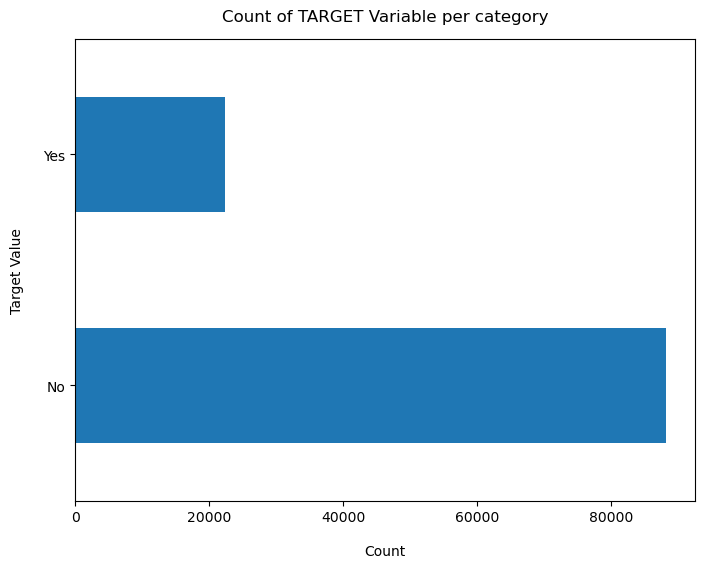

In [102]:
base['NoShow'].value_counts().plot(kind='barh', figsize=(8,6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Value", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [103]:
# calculating the % of appointments or not 
base['NoShow'].value_counts()/len(base['NoShow'])*100

No     79.806744
Yes    20.193256
Name: NoShow, dtype: float64

In [104]:
base['NoShow'].value_counts()

No     88208
Yes    22319
Name: NoShow, dtype: int64

In [105]:
missing = pd.DataFrame((base.isnull().sum())*100/base.shape[0]).reset_index()
missing

,index,0
0,Gender,0.0
1,ScheduledDay,0.0
2,AppointmentDay,0.0
3,Age,0.0
4,Scholarship,0.0
5,Hypertension,0.0
6,Diabetes,0.0
7,Alcoholism,0.0
8,Handicap,0.0
9,SMSReceived,0.0


/Users/sinchanasuresh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


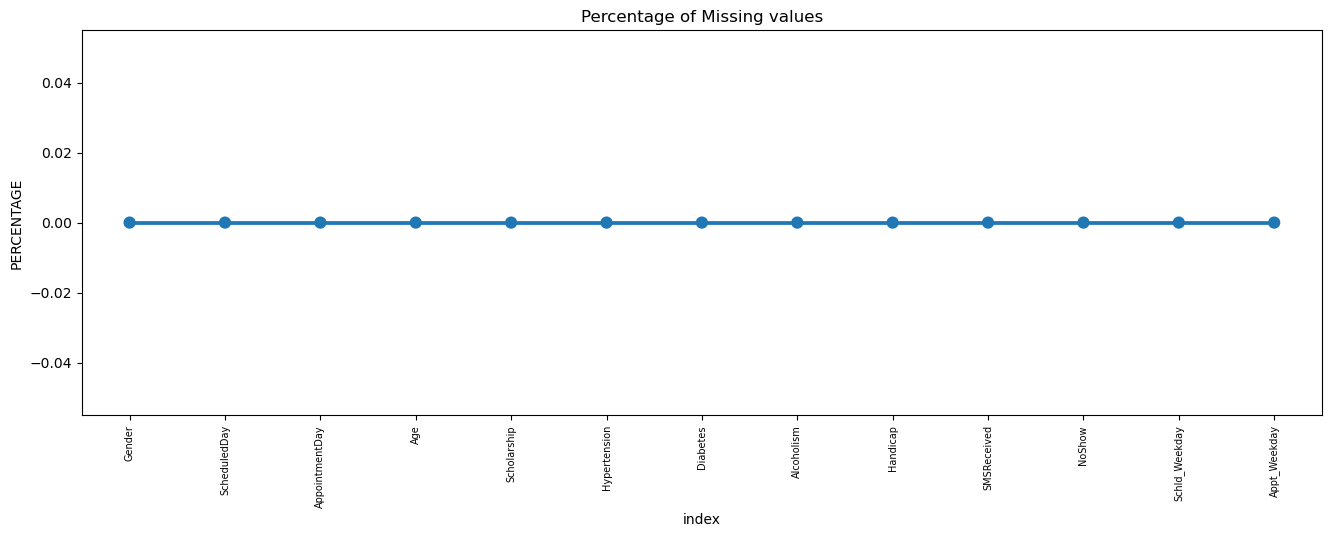

In [106]:
# Having a look that data contains missing values or not
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

# # no missing data

# Data Cleaning

In [107]:
new_data = base.copy()

In [108]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Scholarship     110527 non-null  int64         
 5   Hypertension    110527 non-null  int64         
 6   Diabetes        110527 non-null  int64         
 7   Alcoholism      110527 non-null  int64         
 8   Handicap        110527 non-null  int64         
 9   SMSReceived     110527 non-null  int64         
 10  NoShow          110527 non-null  object        
 11  Schld_Weekday   110527 non-null  int64         
 12  Appt_Weekday    110527 non-null  int64         
dtypes: datetime64[ns](2), int64(9), object(2)
memory usage: 11.0+ MB


# As we don't have any null records, there's no data cleaning required

In [109]:
# Get the max tenure
print(base['Age'].max())

115


In [110]:
labels = ["{0} - {1}".format(i, i + 20) for i in range(1, 118, 20)]

base['Age_group'] = pd.cut(base.Age, range(1, 130, 20), right=False, labels=labels)

In [111]:
labels

['1 - 21', '21 - 41', '41 - 61', '61 - 81', '81 - 101', '101 - 121']

In [112]:
base.drop(['Age'], axis=1, inplace=True)

# Data Exploration

In [113]:
list(base.columns)

['Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMSReceived',
 'NoShow',
 'Schld_Weekday',
 'Appt_Weekday',
 'Age_group']

---------- Gender ----------
F    71840
M    38687
Name: Gender, dtype: int64
---------- ScheduledDay ----------
2016-05-03    4238
2016-05-02    4216
2016-05-16    4120
2016-05-05    4095
2016-05-10    4024
              ... 
2016-04-16       1
2016-01-28       1
2015-11-10       1
2016-03-19       1
2016-03-05       1
Name: ScheduledDay, Length: 111, dtype: int64
---------- AppointmentDay ----------
2016-06-06    4692
2016-05-16    4613
2016-05-09    4520
2016-05-30    4514
2016-06-08    4479
2016-05-11    4474
2016-06-01    4464
2016-06-07    4416
2016-05-12    4394
2016-05-02    4376
2016-05-18    4373
2016-05-17    4372
2016-06-02    4310
2016-05-10    4308
2016-05-31    4279
2016-05-05    4273
2016-05-19    4270
2016-05-03    4256
2016-05-04    4168
2016-06-03    4090
2016-05-24    4009
2016-05-13    3987
2016-05-25    3909
2016-05-06    3879
2016-05-20    3828
2016-04-29    3235
2016-05-14      39
Name: AppointmentDay, dtype: int64
---------- Scholarship ----------
0    99666
1 

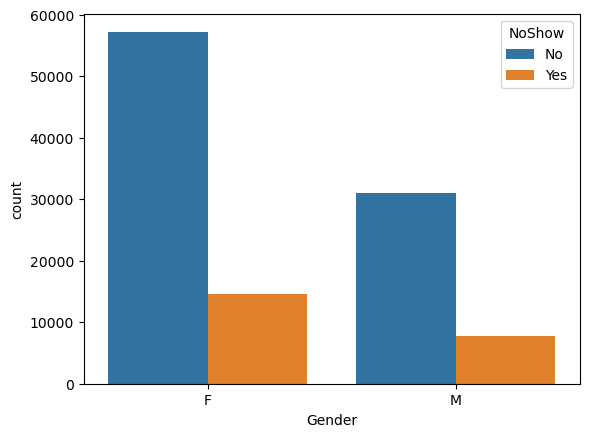

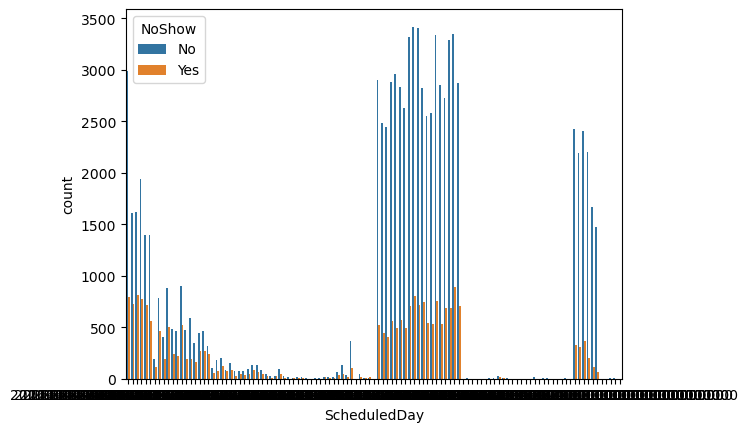

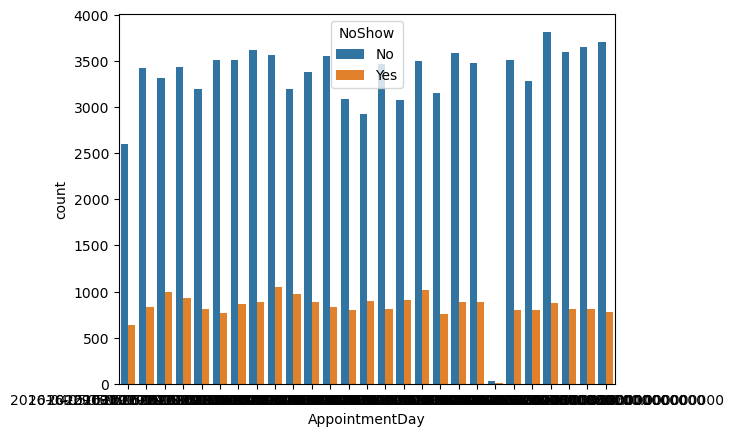

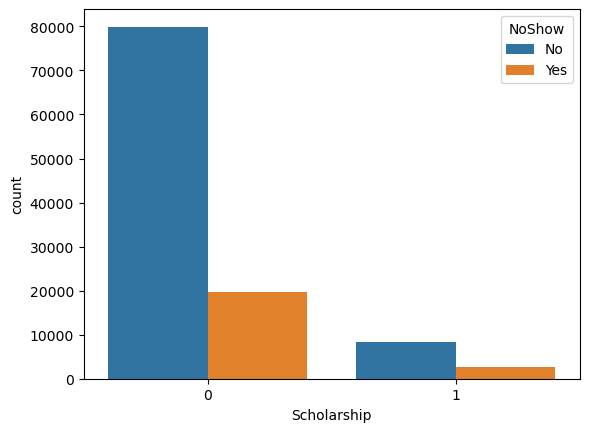

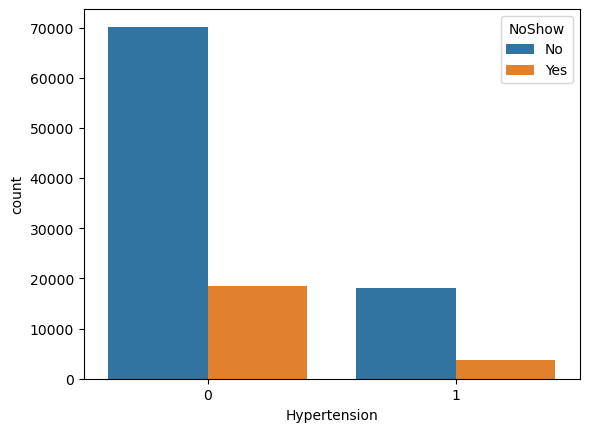

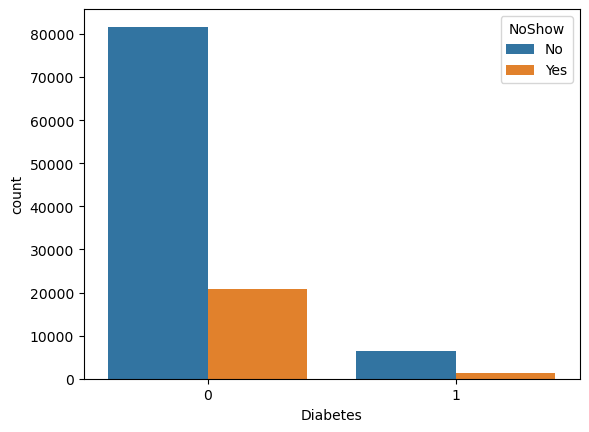

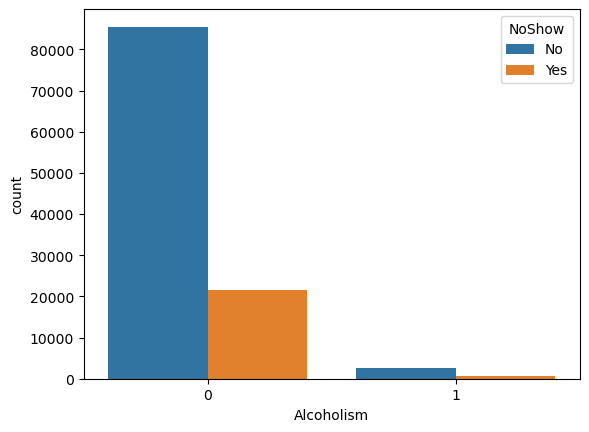

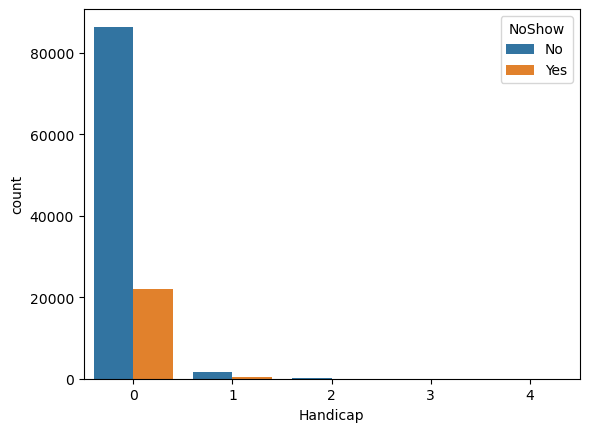

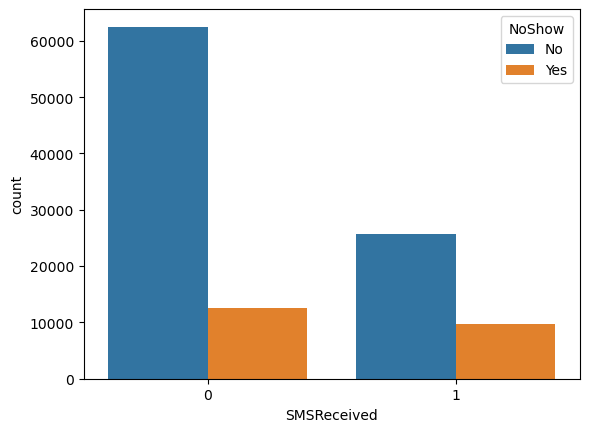

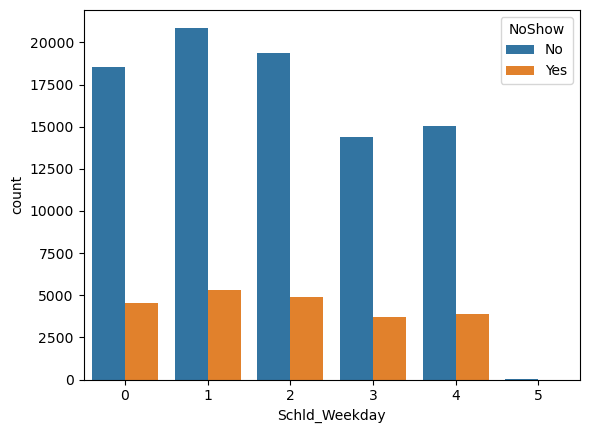

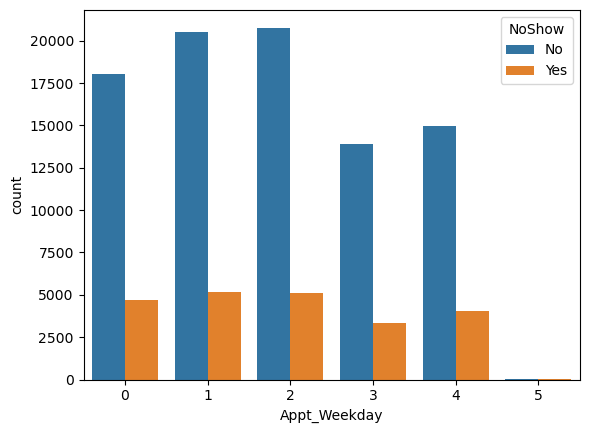

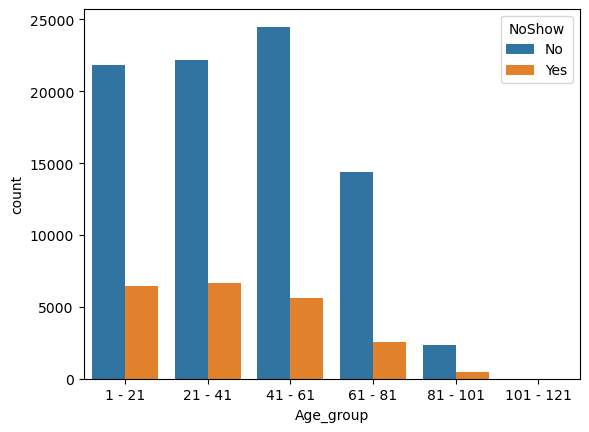

In [114]:
#having a loook into the values of count of each columns and there count in respect to NoShow column
for i, predictor in enumerate(base.drop(columns=['NoShow'])):
    print('-'*10,predictor,'-'*10)
    print(base[predictor].value_counts())    
    plt.figure(i)
    sns.countplot(data=base, x=predictor, hue='NoShow')

In [115]:
base['NoShow'] = np.where(base.NoShow == 'Yes',1,0)

In [116]:
base.NoShow.value_counts()

0    88208
1    22319
Name: NoShow, dtype: int64

In [117]:
base_dummies = pd.get_dummies(base)
base_dummies.head()

,ScheduledDay,AppointmentDay,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,Schld_Weekday,Appt_Weekday,Gender_F,Gender_M,Age_group_1 - 21,Age_group_21 - 41,Age_group_41 - 61,Age_group_61 - 81,Age_group_81 - 101,Age_group_101 - 121
0,2016-04-29,2016-04-29,0,1,0,0,0,0,0,4,4,1,0,0,0,0,1,0,0
1,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,0,1,0,0,1,0,0,0
2,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,1,0,0,0,0,1,0,0
3,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,1,0,1,0,0,0,0,0
4,2016-04-29,2016-04-29,0,1,1,0,0,0,0,4,4,1,0,0,0,1,0,0,0


<AxesSubplot:>

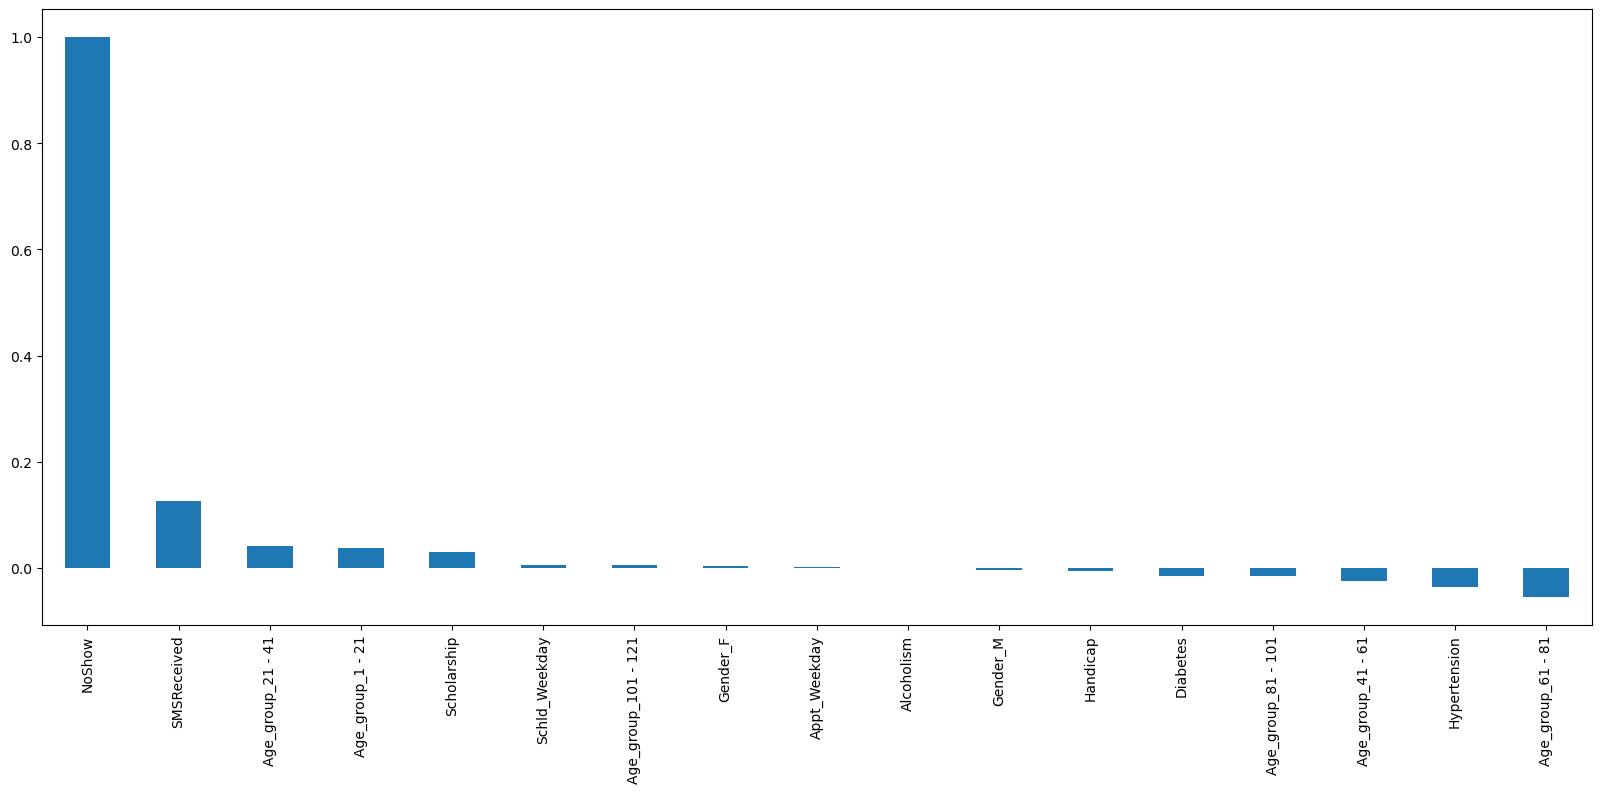

In [119]:
plt.figure(figsize=(20,8))
base_dummies.corr()['NoShow'].sort_values(ascending = False).plot(kind='bar')

<AxesSubplot:>

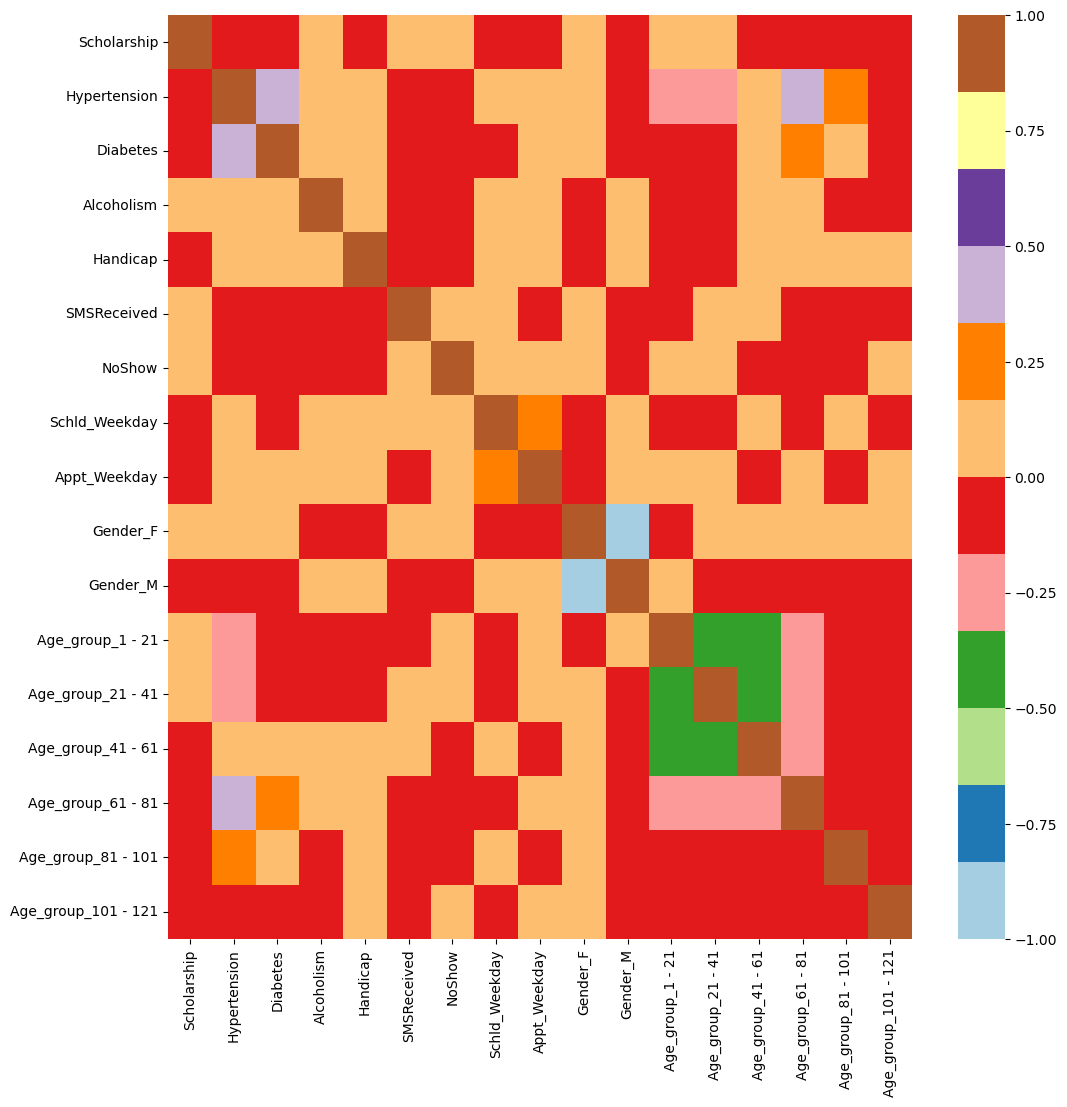

In [122]:
plt.figure(figsize=(12,12))
sns.heatmap(base_dummies.corr(), cmap="Paired")

# Bivariate Analysis

In [125]:
new_df1_target0=base.loc[base["NoShow"]==0]
new_df1_target1=base.loc[base["NoShow"]==1]

In [126]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

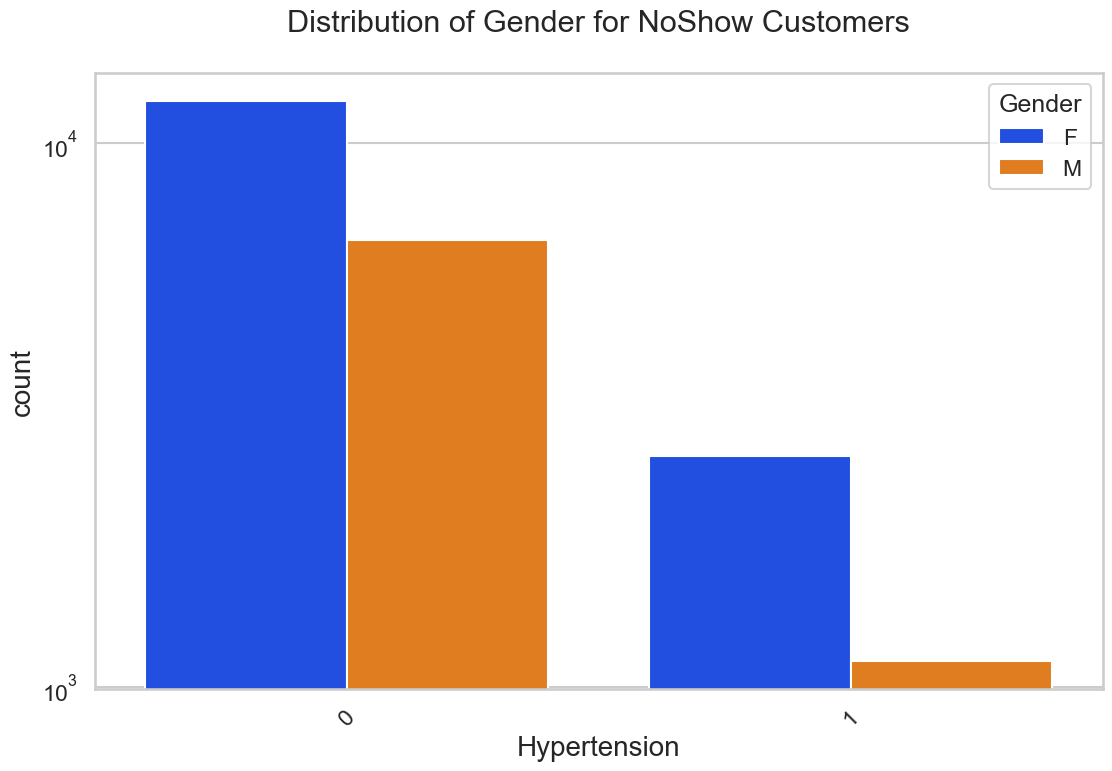

In [127]:
uniplot(new_df1_target1,col='Hypertension',title='Distribution of Gender for NoShow Customers',hue='Gender')

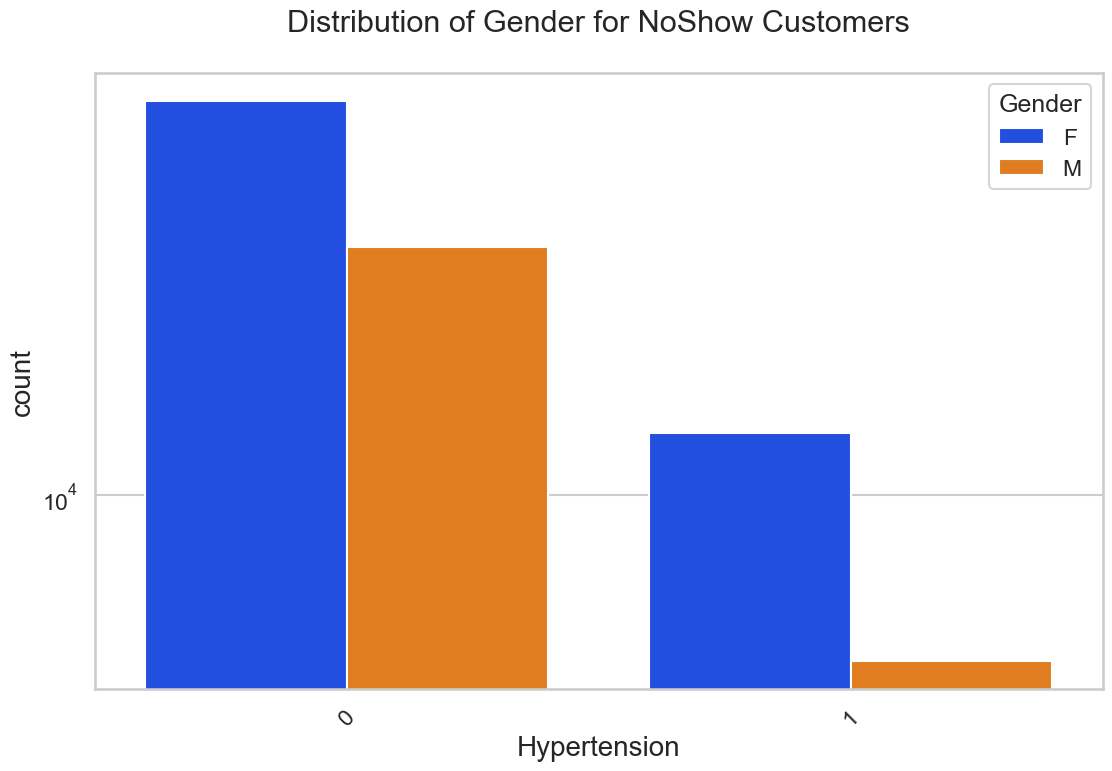

In [128]:
uniplot(new_df1_target0,col='Hypertension',title='Distribution of Gender for NoShow Customers',hue='Gender')


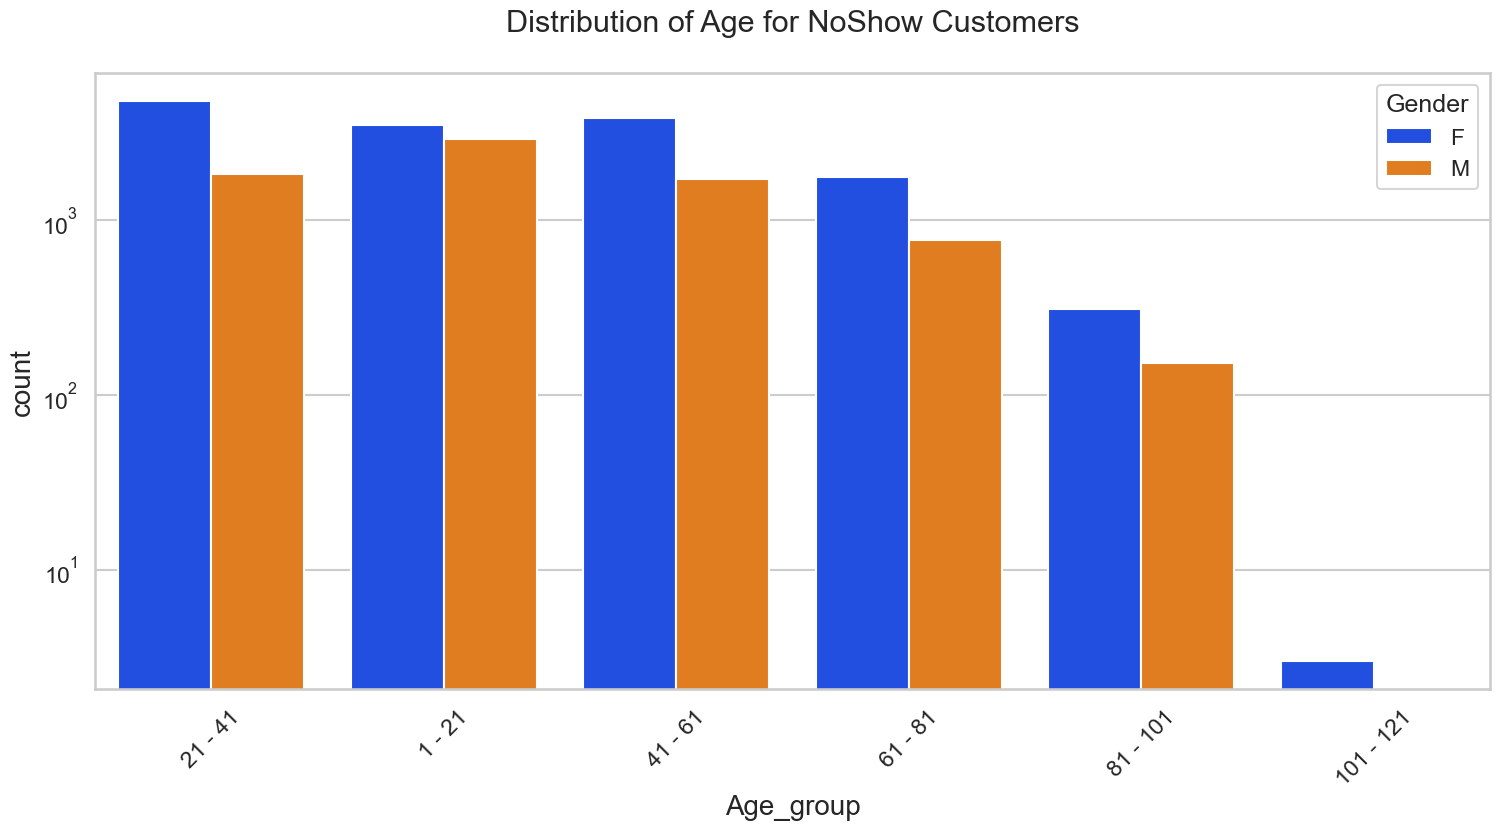

In [129]:
uniplot(new_df1_target1,col='Age_group',title='Distribution of Age for NoShow Customers',hue='Gender')


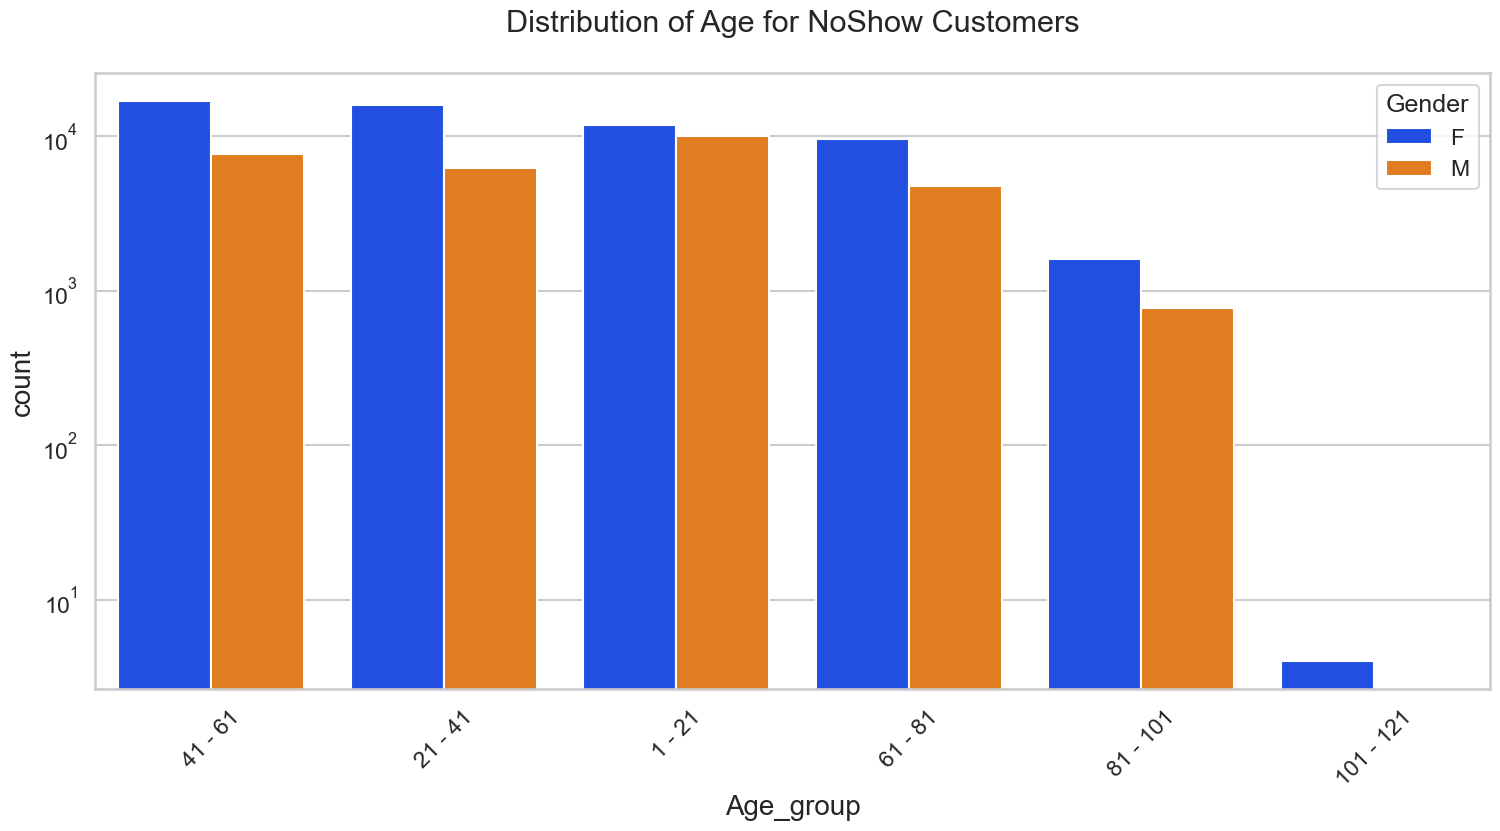

In [130]:
uniplot(new_df1_target0,col='Age_group',title='Distribution of Age for NoShow Customers',hue='Gender')


# Findings

1. **Gender Distribution:**
   - More appointments have been made by female patients compared to male patients.


2. **Age Group Analysis:**
   - The show rate is nearly equal for most age groups, except for Age 0 and Age 1, where an 80% show rate is observed.


3. **Neighbourhood Impact:**
   - Across different neighborhoods, there is an approximately 80% show rate for medical appointments.


4. **Insurance Influence:**
   - Among patients without insurance (99666), approximately 80% attended their appointments.
   - Patients with insurance (21801) showed a slightly lower attendance rate at around 75%.


5. **Hypertension and Diabetes Impact:**
   - Patients without hypertension (88726) exhibited a show rate of around 78%.
   - Patients with hypertension (21801) demonstrated a higher show rate at around 85%.
   - Patients without diabetes (102584) had an 80% show rate, while those with diabetes (7943) showed an 83% attendance rate.


6. **SMS Notification Effect:**
   - Patients who did not receive an SMS reminder (75045) had an 84% show rate.
   - Patients who received an SMS reminder (35482) showed a slightly lower attendance rate at around 72%.


7. **Weekday Appointments:**
   - There are no appointments scheduled on Sundays.
   - Appointments on Saturdays are comparatively less frequent than on other weekdays.